<a href="https://colab.research.google.com/github/alialaki/Applied-AI-ML-for-HR/blob/main/Applied_AI_for_HR_code_03_XX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DISCOVERING Collaboration Between Teams and People**

#Summary of Number of nodes is connected with

*   Clustering Co-efficient
*   Centrality


*   Betweenness




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

from csv import reader

Mounted at /content/drive


#**03.04. Preparing Network Data**

In [ ]:
#Loading the data
#chat_csv = pd.read_csv('/content/drive/MyDrive/Applied AI for Human Resources-LinkedinLearning/chat_groups.csv')
#Data frame to store employee pairs.
employee_pairs = pd.DataFrame(columns=['First', 'Second', 'Count'])

#Read file and extract pairs and weight
with open('/content/drive/MyDrive/Applied AI for Human Resources-LinkedinLearning/chat_groups.csv', 'r', encoding="utf-8-sig") as read_obj:
    #Pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    #Iterate over each row in the csv using reader object
    for row in csv_reader:
      #Sort by employee name
      row.sort()
      #sort and filter for only valid names
      filtered_row = [emp for emp in row if emp != '']

      #Generate employee pairs

      #Iterate for the first employee
      for i in range(0, len(filtered_row)-1):
        #Iterate for the second
        for j in range(i+1, len(filtered_row)):
          first=filtered_row[i]
          second=filtered_row[j]

          #Create the pair record. If Dataframe record already exists
          #Update the count. If not, create it
          curr_rec = employee_pairs[
                              (employee_pairs['First'] == first)
                              & (employee_pairs['Second'] == second)]
          if ( curr_rec.empty ):
            new_def= pd.DataFrame([{
                'First': first,
                'Second': second,
                'Count': 1
            }])

            employee_pairs = pd.concat([employee_pairs, new_def], ignore_index=True)

          else:
            curr_rec.at[curr_rec.index[0], 'Count'] = curr_rec.at[curr_rec.index[0], 'Count'] + 1
            employee_pairs.update(curr_rec)

print(employee_pairs)

    First Second Count
0    Jeff  Stacy     7
1    Jeff    Rob     4
2    Emma   Jeff     6
3    Emma    Rob     3
4    Emma  Stacy     4
5     Rob  Stacy     4
6    Emma   Mike     3
7    Jeff   Mike     5
8    Mike    Rob     3
9    Mike  Stacy     5
10   Jeff   Lisa     5
11   Emma   Lisa     2
12   Emma  Mason     1
13   Jeff  Mason     2
14   Lisa  Mason     6
15   Lisa   Mike     2
16  Mason   Mike     2
17   Lisa  Stacy     2
18  David   Jeff     1
19  David   Lisa     6
20  David  Stacy     1
21  David  Mason     4
22  David  Sofia     3
23   Lisa  Sofia     4
24  Mason  Sofia     3


#**03.05. create and visualize the network**

In [ ]:
#Create a networkX graph
graph_emps= nx.Graph()

#Add Edges based on the Dataframe (nodes gets added automatically)
for i,row in employee_pairs.iterrows():
  graph_emps.add_edge(row['First'], row['Second'], weight=row['Count'])

#Print network summmary
print(f"Network Summary:")
print(f"Number of nodes: {graph_emps.number_of_nodes()}")
print(f"Number of edges: {graph_emps.number_of_edges()}")
list(nx.connected_components(graph_emps))


Network Summary:
Number of nodes: 9
Number of edges: 25


[{'David', 'Emma', 'Jeff', 'Lisa', 'Mason', 'Mike', 'Rob', 'Sofia', 'Stacy'}]

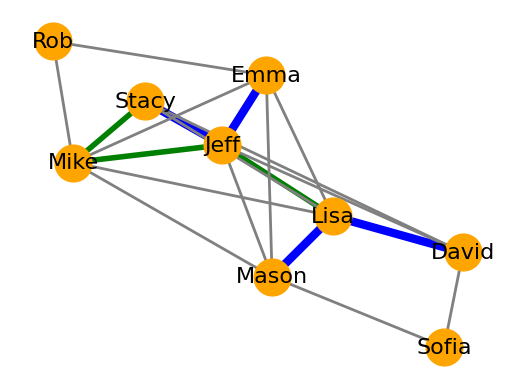

In [ ]:
#Create different types of edges based on their cohesion

#We want to differentiate the edges based on the count of times the pair of employees

#Pairs with Count > 5 for high cohesion
elarge = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) if data['weight'] > 5]

#Pairs with Count between 4 and 5 for meium cohesion
emedium = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) if 4 < data['weight'] <= 5]

#Pairs with Count less than 4 for low cohesion
esmall = [(x1, x2) for (x1, x2, data) in graph_emps.edges(data=True) if data['weight'] <= 3]

#Position for all nodes
pos = nx.spring_layout(graph_emps)

## Setup the graph
# nodes
nx.draw_networkx_nodes(graph_emps, pos,
                       node_size=700,
                       node_color='orange')

# edges
nx.draw_networkx_edges(graph_emps, pos,
                       edgelist=elarge,
                       width=6,
                       edge_color='blue')

nx.draw_networkx_edges(graph_emps, pos,
                       edgelist=emedium,
                       width=4,
                       edge_color='green')

nx.draw_networkx_edges(graph_emps, pos,
                       edgelist=esmall,
                       width=2,
                       edge_color='gray')

# labels
nx.draw_networkx_labels(graph_emps,
                        pos,
                        font_size=16,
                        font_family='sans-serif')

# show graph
plt.axis('off')
plt.show()


##**03.06. Analyzing the network**

In [ ]:
#Function to sort a dictionary by blue
def sorted_dict(dict):
  sorted_dict = sorted(dict.items(), key=lambda x: x[1], reverse=True)

  for key, value in sorted_dict:
    print(f"{key}: {value}")

#Find number of nodes they are connected with
print("\nNodes Mason is connected with : \n------------------------")
print(nx.degree(graph_emps, 'Mason'))

#Clustering -how close a team they form
print("\nClustering Co-efficient : \n------------------------")
sorted_dict(nx.clustering(graph_emps, weight='weight' ))

#Find centrality of nodes
print("\nCentrality : \n------------------------")
sorted_dict(nx.degree_centrality(graph_emps))

#Find betweenness of nodes
print("\nBetweenness : \n------------------------")
sorted_dict(nx.betweenness_centrality(graph_emps, weight='weight'))



Nodes Mason is connected with : 
------------------------
6

Clustering Co-efficient : 
------------------------
Rob: 0.5582006819632445
Sofia: 0.5534410733858209
Stacy: 0.3900329404151805
Mike: 0.38974635553194814
Jeff: 0.38195292174533335
Emma: 0.3793204320130199
Lisa: 0.32170848285500264
David: 0.3144738551035591
Mason: 0.2915556156651455

Centrality : 
------------------------
Jeff: 0.875
Lisa: 0.875
Stacy: 0.75
Emma: 0.75
Mike: 0.75
Mason: 0.75
David: 0.625
Rob: 0.5
Sofia: 0.375

Betweenness : 
------------------------
Mason: 0.25
David: 0.17857142857142855
Jeff: 0.14285714285714285
Emma: 0.125
Stacy: 0.10714285714285714
Lisa: 0.07142857142857142
Mike: 0.017857142857142856
Rob: 0.0
Sofia: 0.0
